In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("movie_data_2024.csv")

In [3]:
df.head(5)

,Title,Genre,Director,Year,Runtime,Rating,Votes
0,Guardians of the Galaxy,Action,James Gunn,2014.0,121.0,8.1,757074.0
1,Prometheus,Adventure,Ridley Scott,2012.0,124.0,7.0,485820.0
2,Split,Horror,M. Night Shyamalan,2016.0,117.0,7.3,157606.0
3,Sing,Animation,Christophe Lourdelet,2016.0,108.0,7.2,60545.0
4,Suicide Squad,Action,David Ayer,2016.0,123.0,6.2,393727.0


<Axes: >

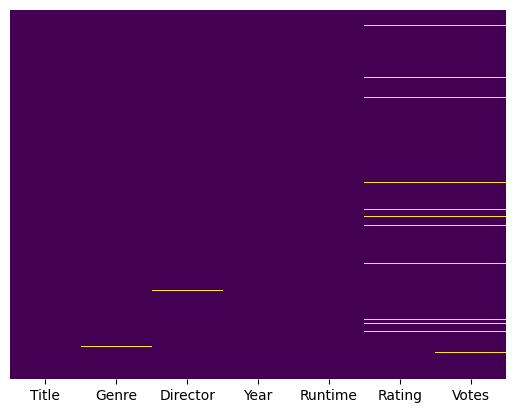

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Runtime'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

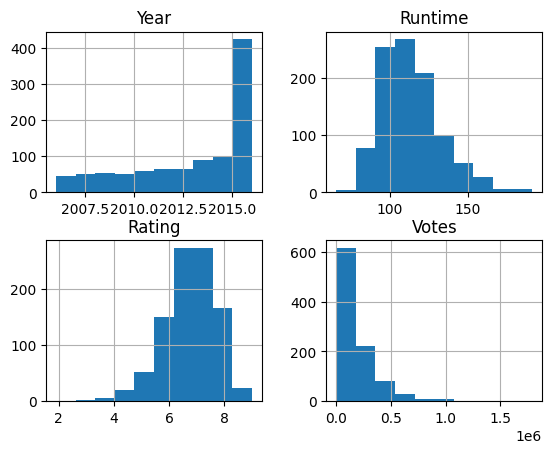

In [5]:
df.hist()

In [6]:
new_df = df
new_df.dropna(subset = ['Director'], inplace = True, axis = 0)

In [7]:
#new_df['Genre'].value_counts()
new_df['Genre'].fillna('Action', inplace=True)

In [8]:
#new_df['Rating'].median()
new_df['Rating'].fillna(6.8, inplace=True)

In [9]:
#new_df['Votes'].median()
new_df['Votes'].fillna(113460.5, inplace=True)

<Axes: >

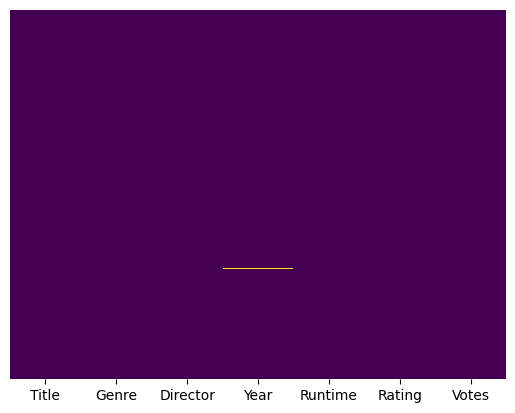

In [10]:
sns.heatmap(new_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
new_df.describe()

,Year,Runtime,Rating,Votes
count,995.000000,997.000000,998.000000,9.980000e+02
mean,2012.802010,113.190572,6.738577,1.712660e+05
std,3.198654,18.831844,0.913448,1.872768e+05
min,2006.000000,66.000000,1.900000,6.100000e+01
25%,2010.000000,100.000000,6.200000,4.322650e+04
50%,2014.000000,111.000000,6.800000,1.134605e+05
75%,2016.000000,123.000000,7.400000,2.374790e+05
max,2016.000000,191.000000,9.000000,1.791916e+06


<Axes: xlabel='Runtime', ylabel='Genre'>

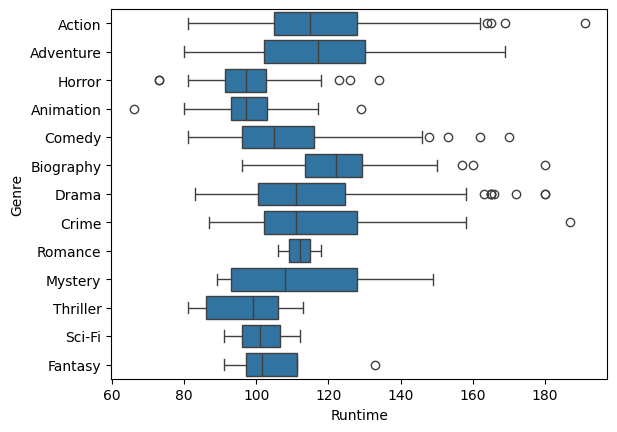

In [12]:
sns.boxplot(x='Runtime', y='Genre', data=new_df)

<Axes: xlabel='Year', ylabel='Runtime'>

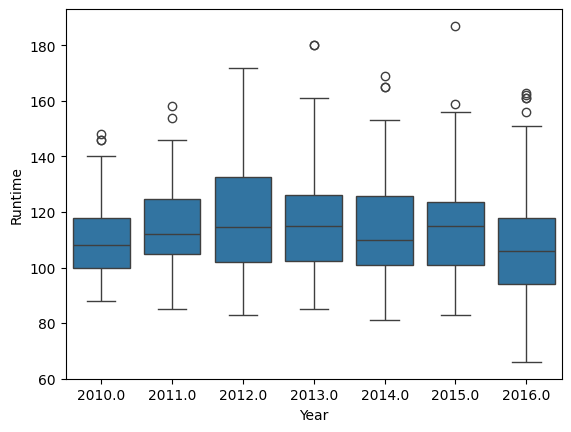

In [13]:
sns.boxplot(x='Year', y='Runtime', data=new_df[new_df['Year'] >= 2010])

In [14]:
new_df.groupby('Genre')['Rating'].mean()

Genre
Action       6.595563
Adventure    6.910667
Animation    7.322449
Biography    7.298438
Comedy       6.484483
Crime        6.833803
Drama        6.990769
Fantasy      5.850000
Horror       5.989130
Mystery      6.838462
Romance      6.600000
Sci-Fi       5.266667
Thriller     6.100000
Name: Rating, dtype: float64

<Axes: xlabel='Year'>

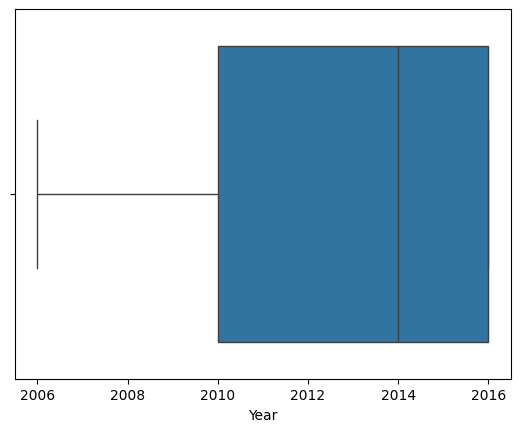

In [15]:
sns.boxplot(x = 'Year', data = new_df)

<Axes: xlabel='Runtime'>

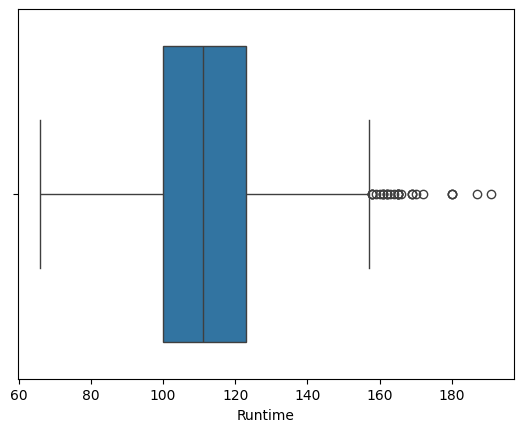

In [16]:
sns.boxplot(x = 'Runtime', data = new_df)

<Axes: xlabel='Rating'>

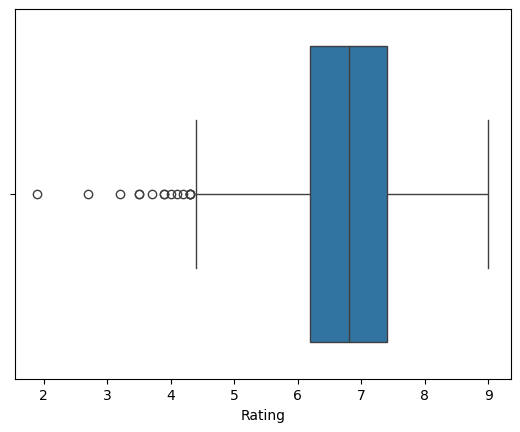

In [17]:
sns.boxplot(x = 'Rating', data = new_df)

<Axes: xlabel='Votes'>

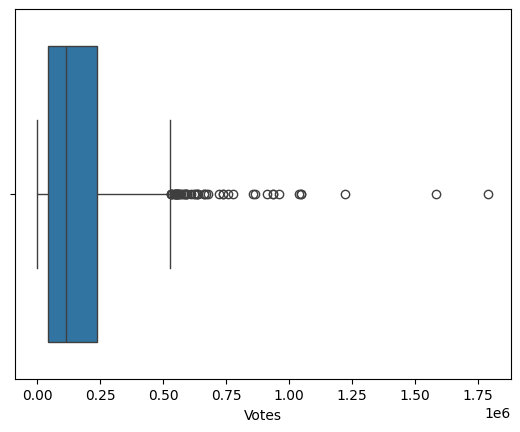

In [18]:
sns.boxplot(x = 'Votes', data = new_df)

In [19]:
new_df1 = new_df

array([[<Axes: title={'center': 'Votes'}>]], dtype=object)

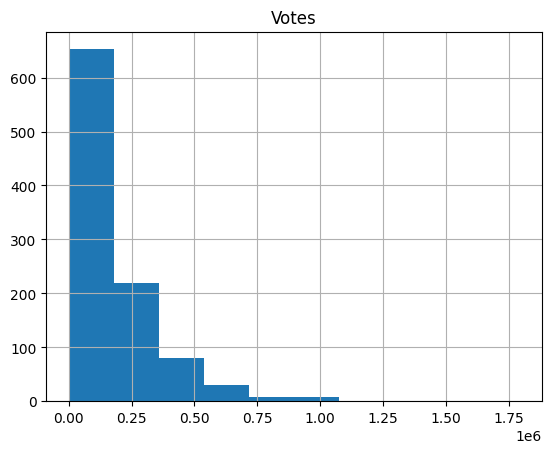

In [20]:
new_df1.hist(column = 'Votes')

array([[<Axes: title={'center': 'Votes'}>]], dtype=object)

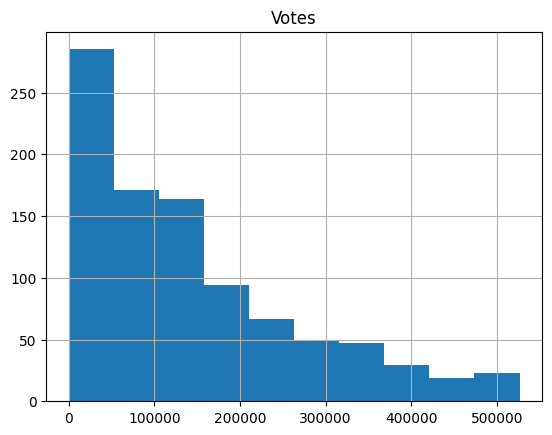

In [21]:
#iqr base to remove outliers
q1 = new_df1['Votes'].quantile(0.25)
q3 = new_df1['Votes'].quantile(0.75)
iqr = q3-q1
temp_df = new_df1[~((new_df1['Votes'] < q1-1.5*iqr) | (new_df1['Votes'] > q3+1.5*iqr))]
temp_df.hist(column = 'Votes')

array([[<Axes: title={'center': 'Votes'}>]], dtype=object)

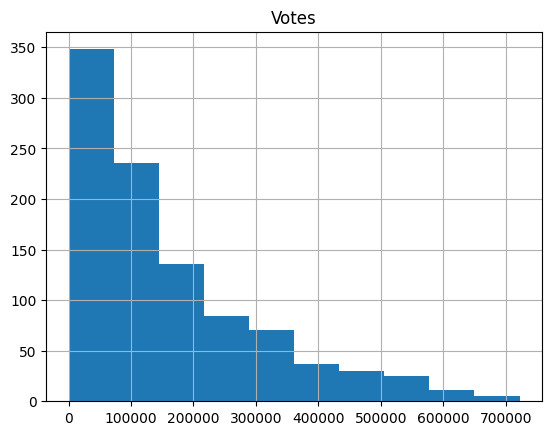

In [22]:
#mean sd base
mean = new_df1['Votes'].mean()
sd = new_df1['Votes'].std()
temp_df2 = new_df1[~((new_df1['Votes'] < mean-3*sd) | (new_df1['Votes'] > mean+3*sd))]
temp_df2.hist(column='Votes')

array([[<Axes: title={'center': 'Votes'}>]], dtype=object)

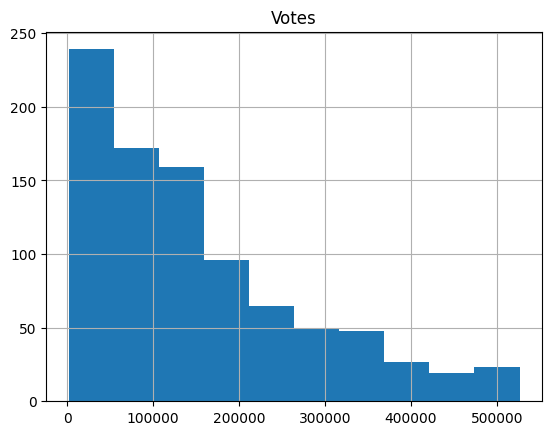

In [23]:
#percentile 5 95
p05 = new_df1['Votes'].quantile(0.05)
p95 = new_df1['Votes'].quantile(0.95)
temp_df3 = new_df1[~((new_df1['Votes'] < p05) | (new_df1['Votes'] > p95))]
temp_df3.hist(column='Votes')

In [24]:
print(temp_df.shape) #iqr
print(temp_df2.shape) #mean sd
print(temp_df3.shape) #percentile 5 95

(948, 7)
(982, 7)
(898, 7)


<Axes: xlabel='Votes'>

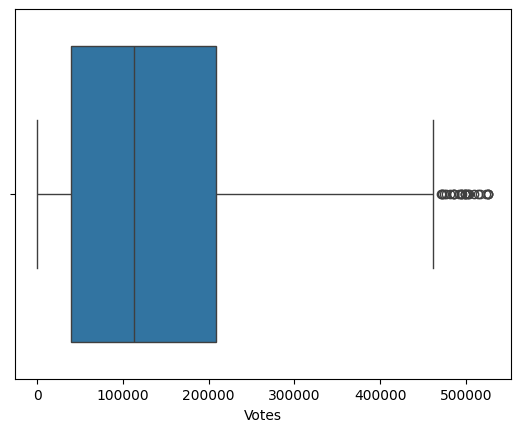

In [25]:
sns.boxplot(x = 'Votes', data = temp_df)

array([[<Axes: title={'center': 'Runtime'}>]], dtype=object)

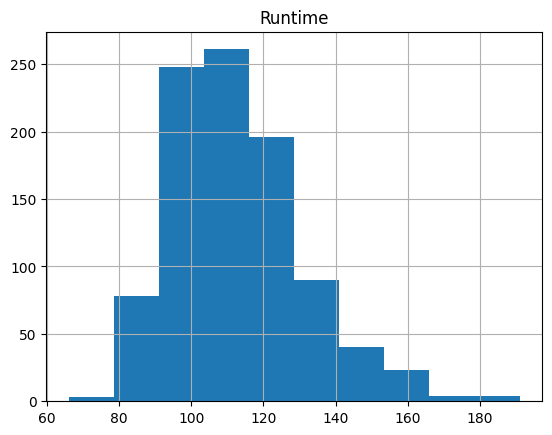

In [26]:
q1 = temp_df['Runtime'].quantile(0.25)
q3 = temp_df['Runtime'].quantile(0.75)
temp_df4 = temp_df[~((temp_df['Runtime'] < q1-1.5*iqr) | (temp_df['Runtime'] > q3+1.5*iqr))]
temp_df4.hist(column='Runtime')

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

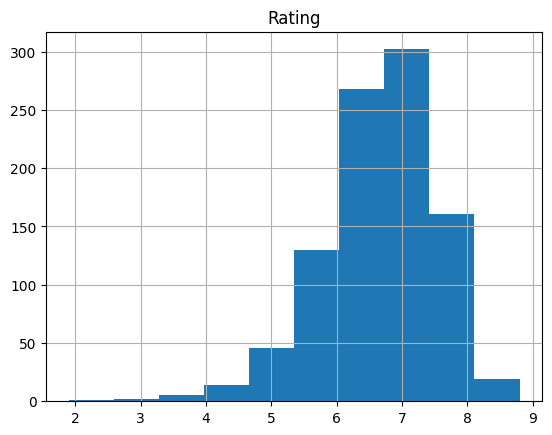

In [27]:
temp_df4 = temp_df[~((temp_df['Rating'] < q1-1.5*iqr) | (temp_df['Rating'] > q3+1.5*iqr))]
temp_df4.hist(column='Rating')

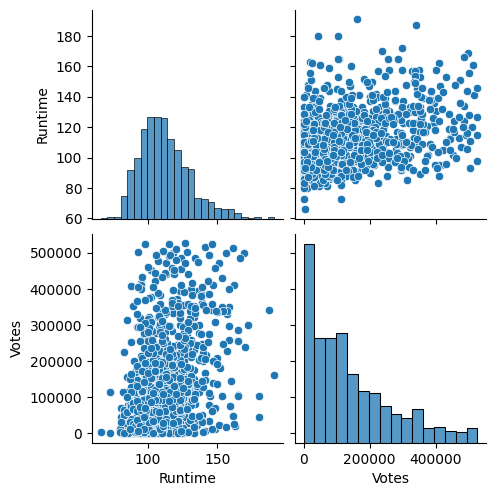

In [28]:
#sns.pairplot(temp_df4, vars = ['Runtime', 'Rating', 'Votes'])
sns.pairplot(temp_df4, vars = ['Runtime', 'Votes'])
#sns.pairplot(temp_df4, vars = ['Runtime', 'Rating'])

In [29]:
temp_df = df.copy()
temp_df["Action"] = np.where(temp_df["Genre"] == 'Action', 'Action', 'Not Action')

In [30]:
temp_df.head(10)

,Title,Genre,Director,Year,Runtime,Rating,Votes,Action
0,Guardians of the Galaxy,Action,James Gunn,2014.0,121.0,8.1,757074.0,Action
1,Prometheus,Adventure,Ridley Scott,2012.0,124.0,7.0,485820.0,Not Action
2,Split,Horror,M. Night Shyamalan,2016.0,117.0,7.3,157606.0,Not Action
3,Sing,Animation,Christophe Lourdelet,2016.0,108.0,7.2,60545.0,Not Action
4,Suicide Squad,Action,David Ayer,2016.0,123.0,6.2,393727.0,Action
5,The Great Wall,Action,Yimou Zhang,2016.0,103.0,6.1,56036.0,Action
6,La La Land,Comedy,Damien Chazelle,2016.0,128.0,8.3,258682.0,Not Action
7,Mindhorn,Comedy,Sean Foley,2016.0,89.0,6.4,2490.0,Not Action
8,The Lost City of Z,Action,James Gray,2016.0,141.0,7.1,7188.0,Action
9,Passengers,Adventure,Morten Tyldum,2016.0,116.0,7.0,192177.0,Not Action


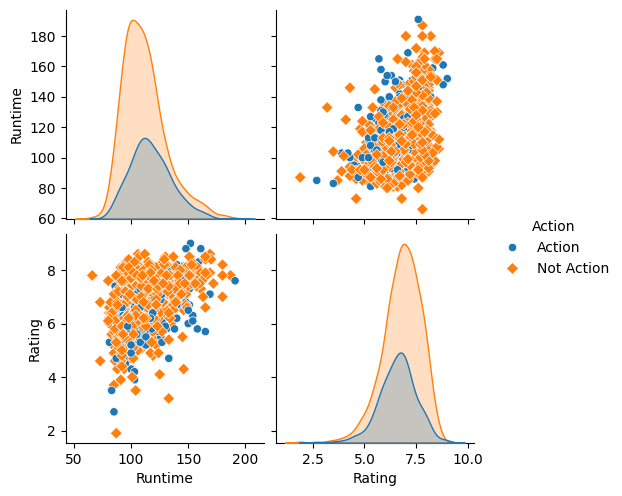

In [31]:
sns.pairplot(temp_df, vars = ['Runtime', 'Rating'], hue = 'Action', markers=["o", "D"])

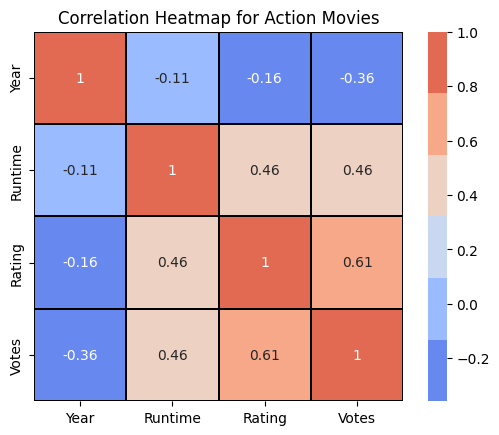

In [32]:
action_df = temp_df[temp_df['Action'] == 'Action']

# Drop non-numeric columns
numeric_df = action_df.select_dtypes(include=['number'])

# Now calculate the correlation
sns.heatmap(numeric_df.corr(),
            square=True,
            linewidths=0.25,
            linecolor=(0, 0, 0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

# Add a title
plt.title('Correlation Heatmap for Action Movies')

# Display the plot
plt.show()

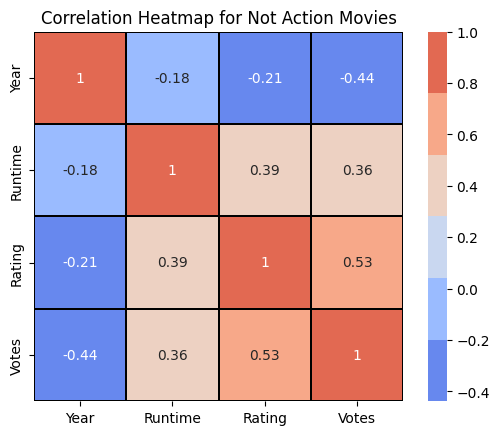

In [33]:
not_action_df = temp_df[temp_df['Action'] == 'Not Action']

# Drop non-numeric columns
numeric_df = not_action_df.select_dtypes(include=['number'])

# Now calculate the correlation
sns.heatmap(numeric_df.corr(),
            square=True,
            linewidths=0.25,
            linecolor=(0, 0, 0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

# Add a title
plt.title('Correlation Heatmap for Not Action Movies')

# Display the plot
plt.show()

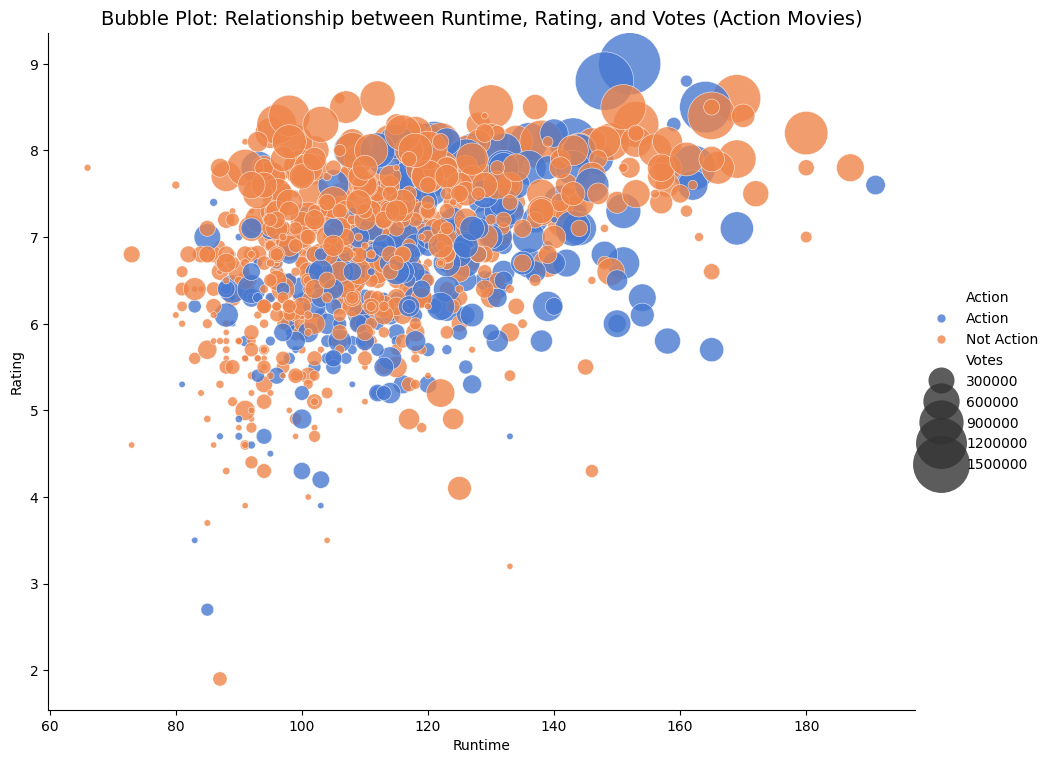

In [49]:
# Bubble plot using sns.relplot
sns.relplot(data=temp_df,
            x='Runtime', 
            y='Rating', 
            size='Votes',  # Bubble size based on 'Votes'
            hue='Action',  # Color the bubbles based on 'Votes'
            sizes=(20, 2000),  # Set the range of bubble sizes
            alpha=0.8,  # Semi-transparent bubbles
            height=7.5, 
            aspect=1.25,
            palette=sns.color_palette("muted",len(temp_df['Action'].unique())))

# Adding title
plt.title('Bubble Plot: Relationship between Runtime, Rating, and Votes (Action Movies)', fontsize=14)

# Display the plot
plt.show()